## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
movies = pd.read_csv('../data/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'], encoding='ISO-8859-1')
ratings = pd.read_csv('../data/ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], encoding='ISO-8859-1')
users = pd.read_csv('../data/users.dat', sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zip_code'], encoding='ISO-8859-1')

### User data

In [4]:
users = users.drop(["zip_code"], axis = 1)

# Create age groups
bins = [0, 18, 25, 35, 45, 50, 56, np.inf]
ages = ['<18', '18-24', '24-34','35-44', '45-49', '50-55', '56+']
users['age_group'] = pd.cut(users['age'], bins, labels=ages)
users = users.drop(["age"], axis = 1)

occupation_map = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

# Map the occupation IDs to occupation names in the users dataframe
users['occupation'] = users['occupation'].map(occupation_map)

users.head()

,user_id,gender,occupation,age_group
0,1,F,K-12 student,<18
1,2,M,self-employed,50-55
2,3,M,scientist,18-24
3,4,M,executive/managerial,35-44
4,5,M,writer,18-24


In [5]:
# Generate user features as a sparse matrix
columnsToEncode = ['age_group','gender','occupation']
myEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
myEncoder.fit(users[columnsToEncode])

user_features = pd.concat([users.drop(columnsToEncode, 1), 
                           pd.DataFrame(myEncoder.transform(users[columnsToEncode]), 
                                        columns = myEncoder.get_feature_names_out(columnsToEncode))], axis=1).reindex()

user_features.head()

,user_id,age_group_18-24,age_group_24-34,age_group_35-44,age_group_45-49,age_group_50-55,age_group_<18,gender_F,gender_M,occupation_K-12 student,occupation_academic/educator,occupation_artist,occupation_clerical/admin,occupation_college/grad student,occupation_customer service,occupation_doctor/health care,occupation_executive/managerial,occupation_farmer,occupation_homemaker,occupation_lawyer,occupation_other or not specified,occupation_programmer,occupation_retired,occupation_sales/marketing,occupation_scientist,occupation_self-employed,occupation_technician/engineer,occupation_tradesman/craftsman,occupation_unemployed,occupation_writer
0,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Movies Data

In [6]:
# One-hot encoding for genres
genres = movies['genres'].str.get_dummies('|')
movies = pd.concat([movies, genres],axis=1).drop(columns={'genres'})
df = movies.merge(ratings,how='left',on='movie_id')

In [7]:
# Generate movie features as a sparse matrix
movie_features = movies.drop(['title'],axis = 1)
movie_features

,movie_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,3950,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,3951,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Ratings Data

In [8]:
data = ratings.drop(["timestamp"], axis = 1)

In [9]:
n = 30

# Find total number of ratings instances for top n movies
data.groupby("movie_id").count().sort_values("user_id", ascending = False).head(n)["rating"].sum()

73972

In [10]:
# Obtain top movies index
top_movies_index = data.groupby("movie_id").count().sort_values("user_id", ascending = False).head(n).reset_index()["movie_id"]

In [11]:
top_movies_features = movie_features[movie_features.movie_id.isin(top_movies_index)]

In [12]:
top_movies_features.to_numpy().shape

(30, 19)

In [13]:

filtered_data_original = data[data["movie_id"].isin(top_movies_index)]

filtered_data_original.head()

,user_id,movie_id,rating
5,1,1197,3
22,1,1270,5
23,1,527,5
26,1,1097,4
38,1,2762,4


In [14]:
filtered_data_original["reward"] = np.where(filtered_data_original["rating"] <5,0,1)

filtered_data_original = filtered_data_original.reset_index(drop = True)

In [15]:
filtered_data_original.head()

,user_id,movie_id,rating,reward
0,1,1197,3,0
1,1,1270,5,1
2,1,527,5,1
3,1,1097,4,0
4,1,2762,4,0


<Axes: >

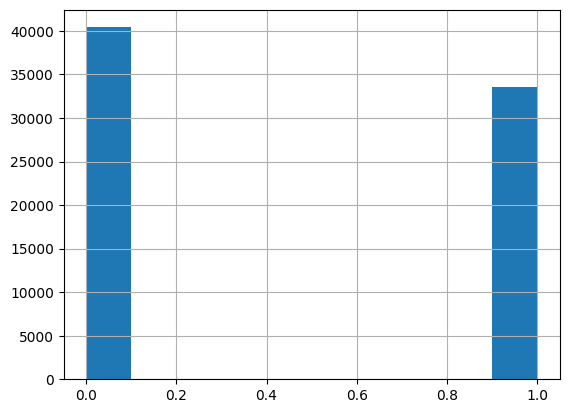

In [16]:
filtered_data_original.reward.hist()

In [17]:
reward_mean = filtered_data_original.reward.mean()
reward_mean

0.45364462228951496

In [18]:

# Reshuffling rows to randomise it
np.random.seed(100)
filtered_data = filtered_data_original.reindex(np.random.permutation(filtered_data_original.index)).reset_index(drop = True)

### LinUCB Disjoint Simulation

In [19]:
# Create class object for a single linear ucb disjoint arm
class linucb_disjoint_arm():
    
    def __init__(self, arm_index, d, alpha):
        
        # Track arm index
        self.arm_index = arm_index
        
        # Keep track of alpha
        self.alpha = alpha
        
        # A: (d x d) matrix = D_a.T * D_a + I_d. 
        # The inverse of A is used in ridge regression 
        self.A = np.identity(d)
        
        # b: (d x 1) corresponding response vector. 
        # Equals to D_a.T * c_a in ridge regression formulation
        self.b = np.zeros([d,1])
        
    def calc_UCB(self, x_array):
        # Find A inverse for ridge regression
        A_inv = np.linalg.inv(self.A)
        
        # Perform ridge regression to obtain estimate of covariate coefficients theta
        # theta is (d x 1) dimension vector
        self.theta = np.dot(A_inv, self.b)
        
        # Find ucb based on p formulation (mean + std_dev) 
        # p is (1 x 1) dimension vector
        p = np.dot(self.theta.T,x_array) +  self.alpha * np.sqrt(np.dot(x_array.T, np.dot(A_inv,x_array)))
        
        return p
    
    def reward_update(self, reward, x_array):
        # Update A which is (d * d) matrix.
        self.A += np.dot(x_array, x_array.T)
        
        # Update b which is (d x 1) vector
        # reward is scalar
        self.b += reward * x_array

In [20]:
class linucb_disjoint_policy():
    
    def __init__(self, K_arms, d, alpha):
        self.K_arms = K_arms
        self.linucb_arms = [linucb_disjoint_arm(arm_index = i, d = d, alpha = alpha) for i in range(K_arms)]
        
    def select_arm(self, x_array):
        # Initiate ucb to be 0
        highest_ucb = -1
        
        # Track index of arms to be selected on if they have the max UCB.
        candidate_arms = []
        
        for arm_index in range(self.K_arms):
            # Calculate ucb based on each arm using current covariates at time t
            arm_ucb = self.linucb_arms[arm_index].calc_UCB(x_array)
            
            # If current arm is highest than current highest_ucb
            if arm_ucb > highest_ucb:
                
                # Set new max ucb
                highest_ucb = arm_ucb
                
                # Reset candidate_arms list with new entry based on current arm
                candidate_arms = [arm_index]

            # If there is a tie, append to candidate_arms
            if arm_ucb == highest_ucb:
                
                candidate_arms.append(arm_index)
        
        # Choose based on candidate_arms randomly (tie breaker)
        chosen_arm = np.random.choice(candidate_arms)
        
        return chosen_arm
    
    def store_arm_index(self, arms_index_array):
    # Arms_features_array is multidimension array of shape (K_arms, 1+arm_dimensions), where 1 is for arm_index

        # Loop through all arms to store the individual arms
        for i in range(self.K_arms):

            self.linucb_arms[i].arm_index = arms_index_array[i]

In [21]:
def ctr_disjoint_simulator(K_arms, d, alpha, epochs, top_movies_index, steps_printout):
    # Initiate policy
    linucb_disjoint_policy_object = linucb_disjoint_policy(K_arms = K_arms, d = d, alpha = alpha)
    
    # Store specific arm_index
    linucb_disjoint_policy_object.store_arm_index(top_movies_index.to_numpy())
    
    # Instantiate trackers
    aligned_time_steps = 0
    cumulative_rewards = 0
    aligned_ctr = []
    unaligned_ctr = [] # for unaligned time steps
    
    for epoch_iter in range(epochs):
        
        print("Epoch: " + str(epoch_iter))
        
        if epoch_iter == 0:
            # Start with filtered data first
            data = filtered_data.copy()
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns = ["user_id", "movie_id","rating","reward"])
        else:
            
            # Recycle unused data
            data = unused_data.copy().reset_index(drop = True)
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns = ["user_id", "movie_id","rating","reward"])
        
        for i in range(len(data)):

            user_id = data.loc[i,"user_id"]
            movie_id = data.loc[i, "movie_id"]

            # x_array: User features
            data_x_array = np.array(user_features.query("user_id == @user_id").drop("user_id", axis = 1)) # Shape (1 * 29), d = 29
            data_x_array = data_x_array.reshape(29,1)

            # Obtain rewards
            data_reward = data.loc[i, "reward"]

            if i%steps_printout == 0:
                print("step "+str(i))

            # Find policy's chosen arm based on input covariates at current time step
            chosen_arm_index = linucb_disjoint_policy_object.select_arm(data_x_array)

            # Check if arm_index is the same as data_arm (ie same actions were chosen)
            # Note that data_arms index range from 1 to 10 while policy arms index range from 0 to 9.
            if linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].arm_index  == movie_id:

                # Use reward information for the chosen arm to update
                linucb_disjoint_policy_object.linucb_arms[chosen_arm_index].reward_update(data_reward, data_x_array)
                
                # For CTR calculation
                aligned_time_steps += 1
                cumulative_rewards += data_reward
                aligned_ctr.append(cumulative_rewards/aligned_time_steps)
            
            else:
                # Recycle data
                unused_data = unused_data.append(data.iloc[i])
                    
    return {"aligned_time_steps": aligned_time_steps, 
            "cumulative_rewards": cumulative_rewards, 
            "aligned_ctr":aligned_ctr, 
            "policy":linucb_disjoint_policy_object}

### LinUCB Hybrid

In [22]:
class linucb_hybrid_arm():
    # Note that shared features coefficients beta_hat is calculated outside of each arm since 
    # it is about shared features across individual arms
    
    def __init__(self, d, k, alpha):
        
        # Arm specific A: (d * d) matrix = D_a.T * D_a + I_d. 
        # The inverse of A is used in ridge regression 
        self.A = np.identity(d)
        
        # B: (d * k) matrix
        # Equals to D_a.T * c_a in ridge regression formulation
        self.B = np.zeros([d, k])
        
        # b: (d * 1) corresponding response vector. 
        # Equals to D_a.T * c_a in ridge regression formulation
        self.b = np.zeros([d,1])
        
        # Alpha hyperparam
        self.alpha = alpha
        
    def init_arm_features(self, arm_index, arm_features_array):
        # Track arm_index
        self.index = arm_index
        
        # arm_features to be used with x_array using outer product to find individual arm z_features
        self.arm_features = arm_features_array
        
        
    def calc_UCB(self, x_array, A_node_inv, beta_hat):
        # beta_hat is the coefficients for Z shared features. (k * 1) vector
        # A_node_inv is (k * k) matrix that is inverse for A_node (shared features)
        
        # Create arm specific z_array with x_array and self.arm_features
        # z_array elements is based on the combination of user and movie features, which is the outer product of both arrays
        # z_array = Outer product = (19 * 29) or (k by d) matrix
        z_array = np.outer(self.arm_features, x_array).reshape(-1,1)
        
        # Find inverse of arm-specific A
        A_inv = np.linalg.inv(self.A)
        
        # Find theta_arm with beta_hat input
        self.theta = np.dot(A_inv, (self.b - np.dot(self.B, beta_hat)))
        
        # std deviation
        s = np.dot(z_array.T, np.dot(A_node_inv, z_array)) \
            - 2 * np.dot(z_array.T, np.dot(A_node_inv, np.dot(self.B.T, np.dot(A_inv, x_array)))) \
            + np.dot(x_array.T, np.dot(A_inv, x_array)) \
            + np.dot(x_array.T, np.dot(A_inv, np.dot(self.B, np.dot(A_node_inv, np.dot(self.B.T, np.dot(A_inv, x_array))))))
        
        
        # UCB
        p = np.dot(z_array.T, beta_hat) + np.dot(x_array.T, self.theta) + self.alpha*np.sqrt(s)
        
        return p
    
    def reward_update(self, reward, x_array, z_array):
        
        # Update A which is (d * d) matrix.
        self.A += np.dot(x_array, x_array.T)
        
        # Update B which is (d * k) matrix.
        self.B += np.dot(x_array, z_array.T)
        
        # Update b which is (d * 1) vector
        # reward is scalar
        self.b += reward * x_array 

In [23]:
class linucb_hybrid_policy():
    
    def __init__(self, K_arms, d, k, alpha):
        self.K_arms = K_arms
        self.linucb_arms = [linucb_hybrid_arm(d = d, k = k, alpha = alpha) for i in range(K_arms)]
        
        # shared A_node: (k * k) matrix
        self.A_node = np.identity(k)
        
        # shared b_node: (k * 1) corresponding response vector. 
        self.b_node = np.zeros([k,1])
        
    def store_arm_features(self, arms_features_array):
        # Arms_features_array is multidimension array of shape (K_arms, 1+arm_dimensions), where 1 is for arm_index
    
        # Loop through all arms to store the individual arms
        for i in range(self.K_arms):
        
            self.linucb_arms[i].init_arm_features(arm_index = arms_features_array[i,0], 
                                                  arm_features_array = arms_features_array[i,1:])
        
    def select_arm(self, x_array):
        # Initiate ucb to be 0
        highest_ucb = -1
        
        # Create inverse of A_node to be fed in
        A_node_inv = np.linalg.inv(self.A_node)
        
        
        # Calc beta_hat using A_node_inv and b_node.
        # (k * 1) vector
        beta_hat = np.dot(A_node_inv, self.b_node)
        
        # Track index of arms to be selected on if they have the max UCB.
        candidate_arms = []
        
        for arm_index in range(self.K_arms):
            # Calculate ucb based on each arm using current covariates at time t
            arm_ucb = self.linucb_arms[arm_index].calc_UCB(x_array, A_node_inv, beta_hat)
            
            # If current arm is highest than current highest_ucb
            if arm_ucb > highest_ucb:
                
                # Set new max ucb
                highest_ucb = arm_ucb
                
                # Reset candidate_arms list with new entry based on current arm
                candidate_arms = [arm_index]

            # If there is a tie, append to candidate_arms
            if arm_ucb == highest_ucb:
                
                candidate_arms.append(arm_index)
        
        # Choose based on candidate_arms randomly (tie breaker)
        chosen_arm_index = np.random.choice(candidate_arms)
        
        return chosen_arm_index
    
    def update_shared_features_matrices_phase1(self, chosen_arm_B, chosen_arm_A, chosen_arm_b):
        # Use chosen arm's B (d*k), A(d*d), b(k*1) for update of shared feature matrices
        
        chosen_arm_A_inv = np.linalg.inv(chosen_arm_A)
        
        self.A_node += np.dot(chosen_arm_B.T, np.dot(chosen_arm_A_inv, chosen_arm_B))
        self.b_node += np.dot(chosen_arm_B.T, np.dot(chosen_arm_A_inv, chosen_arm_b))
        
    def update_shared_features_matrices_phase2(self, z_array, reward, chosen_arm_B, chosen_arm_A, chosen_arm_b):
        
        chosen_arm_A_inv = np.linalg.inv(chosen_arm_A)
        
        self.A_node += np.dot(z_array, z_array.T) - np.dot(chosen_arm_B.T, np.dot(chosen_arm_A_inv, chosen_arm_B)) 
        self.b_node += reward * z_array - np.dot(chosen_arm_B.T, np.dot(chosen_arm_A_inv, chosen_arm_b))

In [24]:
def ctr_simulator(K_arms, d, k, alpha, epochs, top_movies_index, top_movies_features, steps_printout):
    # Initiate policy
    linucb_hybrid_policy_object = linucb_hybrid_policy(K_arms = K_arms, d = d, k = k, alpha = alpha)
    
    # Store arm specific features
    linucb_hybrid_policy_object.store_arm_features(top_movies_features.to_numpy())
    
    # Instantiate trackers
    aligned_time_steps = 0
    cumulative_rewards = 0
    aligned_ctr = []
    unaligned_ctr = [] # for unaligned time steps
    
    for epoch_iter in range(epochs):
        
        print("Epoch: " + str(epoch_iter))
        
        if epoch_iter == 0:
            # Start with filtered data first
            data = filtered_data.copy()
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns = ["user_id", "movie_id","rating","reward"])
        else:
            
            # Recycle unused data
            data = unused_data.copy().reset_index(drop = True)
            # Initiate unused_data df
            unused_data = pd.DataFrame(columns = ["user_id", "movie_id","rating","reward"])
        
        for i in range(len(data)):

            user_id = data.loc[i,"user_id"]
            movie_id = data.loc[i, "movie_id"]

            # x_array: User features
            data_x_array = np.array(user_features.query("user_id == @user_id").drop("user_id", axis = 1)) # Shape (1 * 29), d = 29
            data_x_array = data_x_array.reshape(29,1)

            # Obtain rewards
            data_reward = data.loc[i, "reward"]

            if i%steps_printout == 0:
                print("step "+str(i))

            # Find policy's chosen arm based on input covariates at current time step
            chosen_arm_index = linucb_hybrid_policy_object.select_arm(data_x_array)


            # Check if arm_index is the same as data_arm (ie same actions were chosen)
            # Note that data_arms index range from 1 to 10 while policy arms index range from 0 to 9.
            if linucb_hybrid_policy_object.linucb_arms[chosen_arm_index].index  == movie_id:


                # Phase 1: Update shared feature matrices A_node, b_node in policy object
                linucb_hybrid_policy_object.update_shared_features_matrices_phase1(linucb_hybrid_policy_object.linucb_arms[chosen_arm_index].B,
                                                                                   linucb_hybrid_policy_object.linucb_arms[chosen_arm_index].A,
                                                                                   linucb_hybrid_policy_object.linucb_arms[chosen_arm_index].b)
                
                # Extract chosen_arm arm_features to create z_array
                data_z_array = np.outer(linucb_hybrid_policy_object.linucb_arms[chosen_arm_index].arm_features, data_x_array).reshape(-1,1)
                
                # Use reward information for the chosen arm to update
                linucb_hybrid_policy_object.linucb_arms[chosen_arm_index].reward_update(data_reward, data_x_array, data_z_array)

                # Phase 2: Update shared feature matrices A_node, b_node in policy object
                linucb_hybrid_policy_object.update_shared_features_matrices_phase2(data_z_array,
                                                                                   data_reward,
                                                                                   linucb_hybrid_policy_object.linucb_arms[chosen_arm_index].B,
                                                                                   linucb_hybrid_policy_object.linucb_arms[chosen_arm_index].A,
                                                                                   linucb_hybrid_policy_object.linucb_arms[chosen_arm_index].b)

                # For CTR calculation
                aligned_time_steps += 1
                cumulative_rewards += data_reward
                aligned_ctr.append(cumulative_rewards/aligned_time_steps)
            
            else:
                # Recycle data
                unused_data = unused_data.append(data.iloc[i])

    return {"aligned_time_steps": aligned_time_steps, 
            "cumulative_rewards": cumulative_rewards, 
            "aligned_ctr":aligned_ctr, 
            "policy":linucb_hybrid_policy_object}

### Disjoint vs Hybrid

Epoch: 0
step 0
step 5000
step 10000
step 15000
step 20000
step 25000
step 30000
step 35000
step 40000
step 45000
step 50000
step 55000
step 60000
step 65000
step 70000
Epoch: 1
step 0
step 5000
step 10000
step 15000
step 20000
step 25000
step 30000
step 35000
step 40000
step 45000
step 50000
step 55000
step 60000
step 65000
step 70000


Text(0.5, 1.0, 'alpha = 0.25')

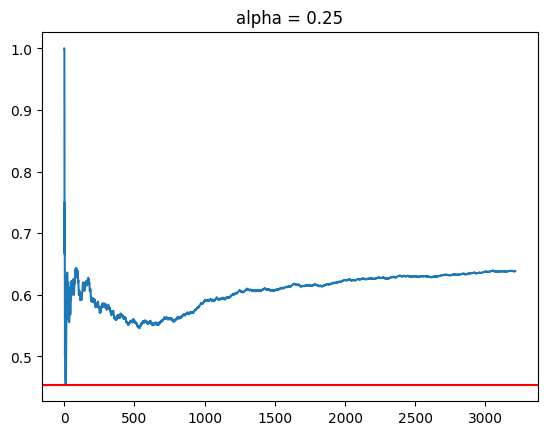

In [25]:
alpha_value = 0.25
simulation_disjoint_alpha_025 = ctr_disjoint_simulator(K_arms = n, 
                                                       d = 29,
                                                       alpha = alpha_value, 
                                                       epochs = 2, 
                                                       top_movies_index = top_movies_index, 
                                                       steps_printout=5000)
plt.plot(simulation_disjoint_alpha_025["aligned_ctr"])
plt.axhline(y=reward_mean, color = "red")
plt.title("alpha = "+str(alpha_value))

Epoch: 0
step 0
step 5000
step 10000
step 15000
step 20000
step 25000
step 30000
step 35000
step 40000
step 45000
step 50000
step 55000
step 60000
step 65000
step 70000
Epoch: 1
step 0
step 5000
step 10000
step 15000
step 20000
step 25000
step 30000
step 35000
step 40000
step 45000
step 50000
step 55000
step 60000
step 65000
step 70000


Text(0.5, 1.0, 'alpha = 0.25')

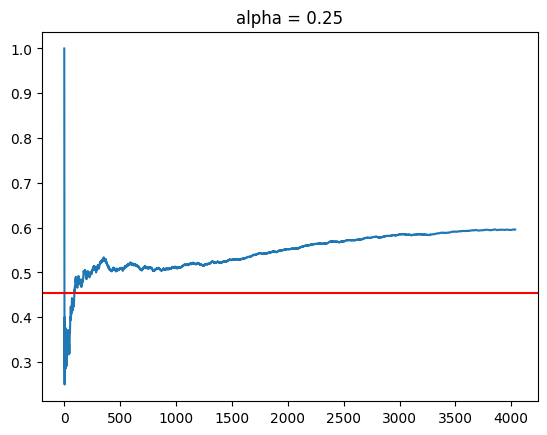

In [26]:
alpha_value = 0.25
simulation_hybrid_alpha_025 = ctr_simulator(K_arms = n, 
                                           d = 29,
                                           k = 29*18,
                                           alpha = alpha_value, 
                                           epochs = 2, 
                                           top_movies_index = top_movies_index, 
                                           top_movies_features=top_movies_features,
                                           steps_printout=5000)
plt.plot(simulation_hybrid_alpha_025["aligned_ctr"])
plt.axhline(y=reward_mean, color = "red")
plt.title("alpha = "+str(alpha_value))

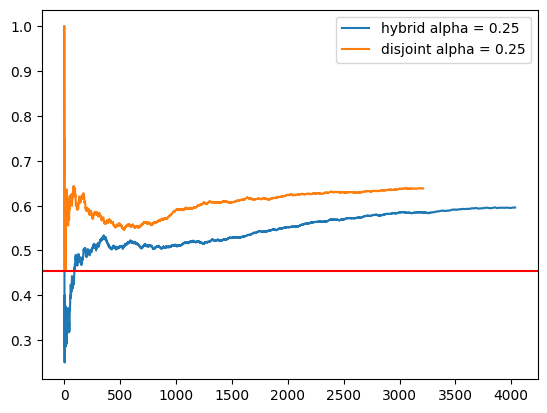

In [27]:
plt.plot(simulation_hybrid_alpha_025["aligned_ctr"], label = "hybrid alpha = 0.25")
plt.plot(simulation_disjoint_alpha_025["aligned_ctr"], label = "disjoint alpha = 0.25")
plt.axhline(y=reward_mean, color = "red")
plt.legend()